<a href="https://colab.research.google.com/github/kous6942/Iris_flower_classification/blob/main/task_3_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('IRIS.csv')
df.head()

Saving IRIS.csv to IRIS.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#stats of the dataset
df.describe()
#The max and min attributes are to be observed along with their mean


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#info on the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#observing each species
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
#checking for null values
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

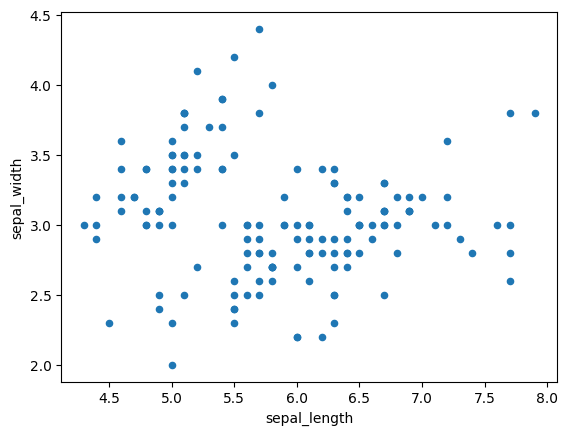

In [ ]:
#visualizing the dataset

#1.
df.plot(kind='scatter', x='sepal_length', y='sepal_width')



<Axes: >

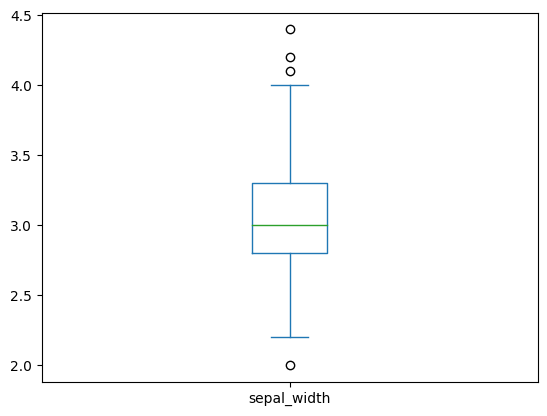

In [ ]:
#2.
df.plot(kind = 'box', x='sepal_length', y='sepal_width')


<Axes: xlabel='petal_length', ylabel='petal_width'>

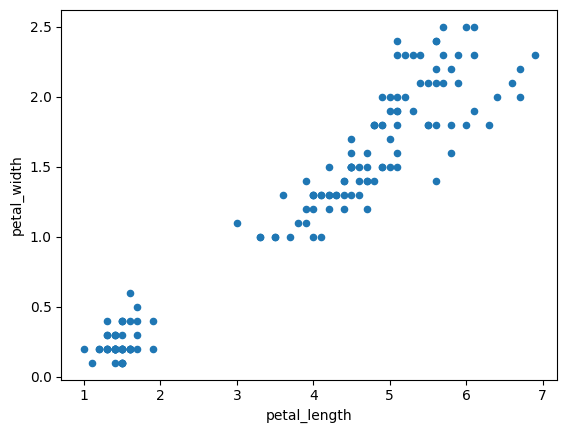

In [ ]:
#3.

df.plot(kind='scatter',x = 'petal_length', y = 'petal_width')

<Axes: >

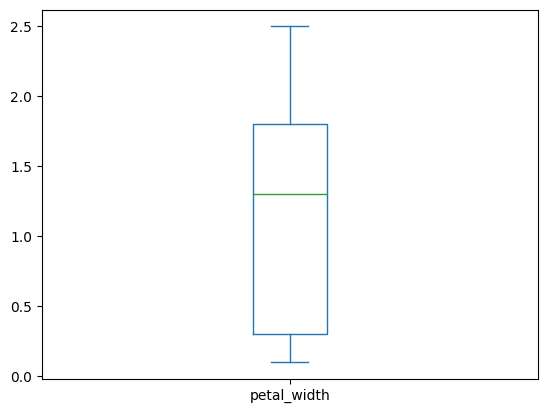

In [ ]:
#4.

df.plot(kind='box',x = 'petal_length', y = 'petal_width')

<Axes: xlabel='petal_length', ylabel='sepal_length'>

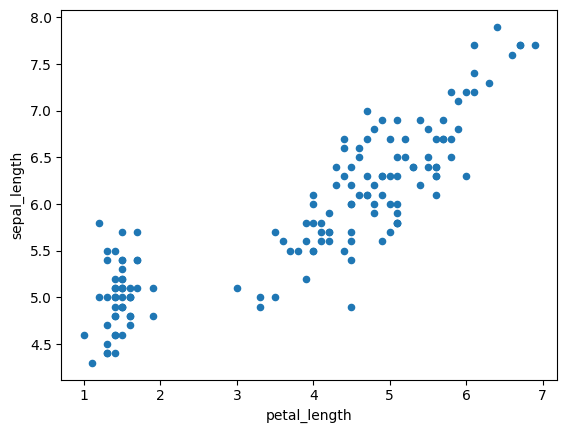

In [ ]:
#5.

df.plot(kind='scatter',x = 'petal_length', y = 'sepal_length')

<Axes: >

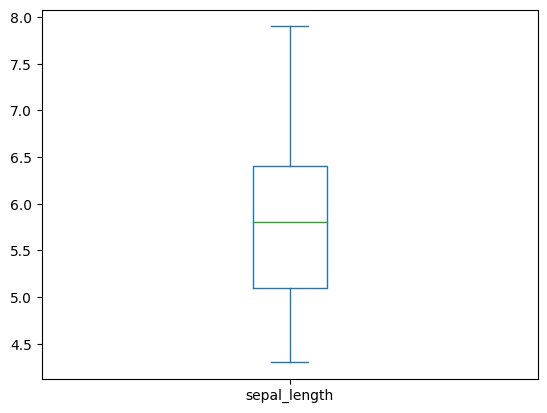

In [ ]:
#6.

df.plot(kind='box',x = 'petal_length', y = 'sepal_length')

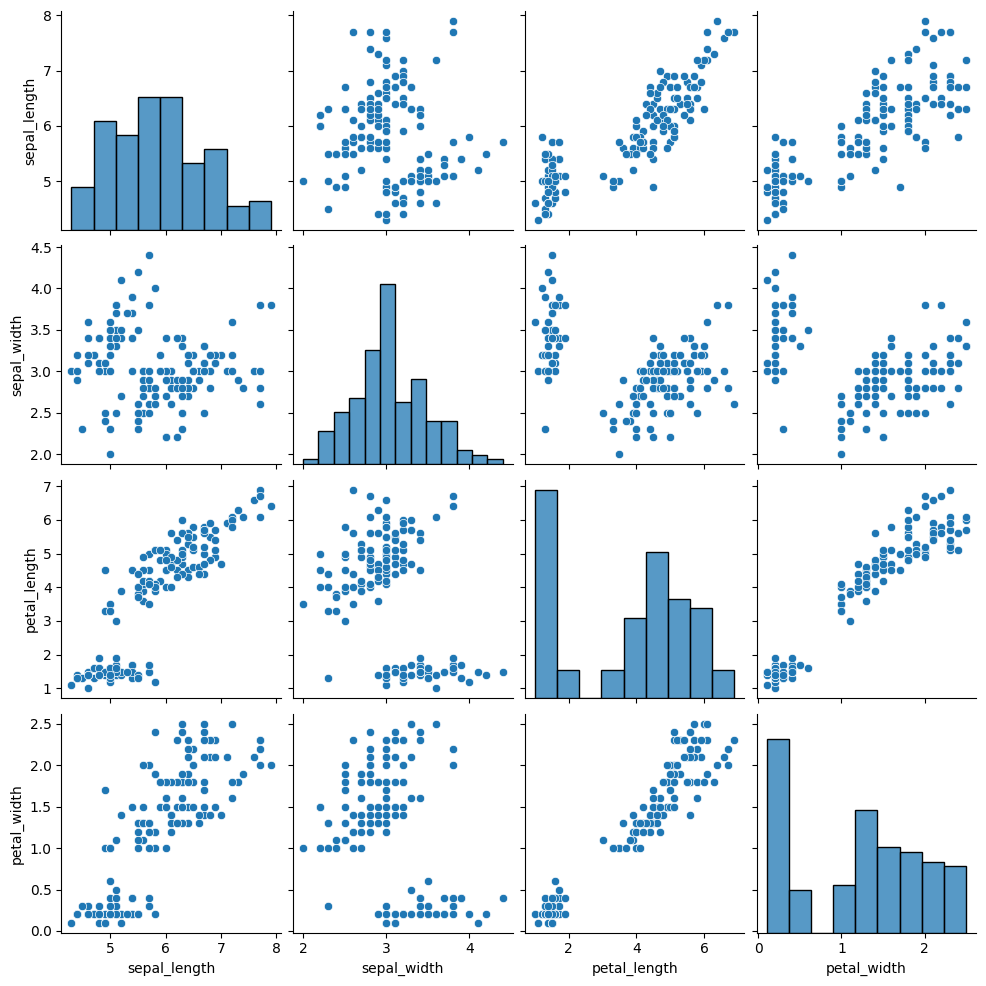

In [ ]:
sns.pairplot(df)

In [ ]:
colors = ['red', 'blue', 'orange']
spec = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

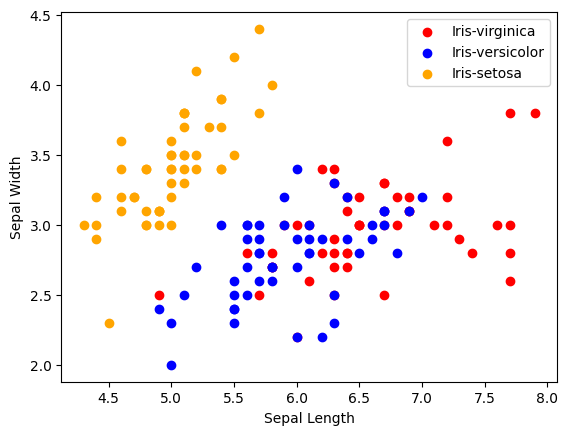

In [ ]:
#sepal width and sepal length
for i in range(3):
  x = df[df['species'] == spec[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c= colors[i],  label=spec[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
plt.legend()


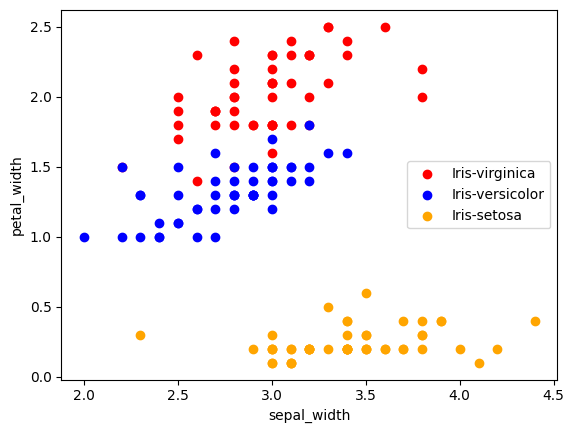

In [ ]:
# sepal width and petal width
for i in range(3):
  x = df[df['species'] == spec[i]]
  plt.scatter(x['sepal_width'], x['petal_width'], c= colors[i],  label=spec[i])
  plt.xlabel('sepal_width')
  plt.ylabel('petal_width')
plt.legend()


<Axes: >

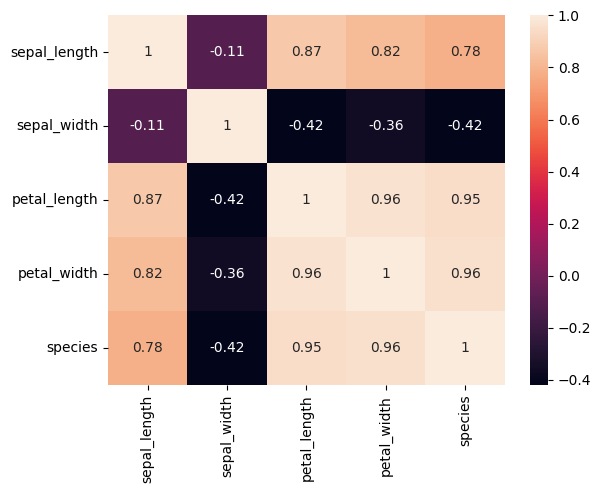

In [ ]:
#creating a correlation matrix to understand the correlation between the variables
corr = df.corr()
sns.heatmap(corr, annot = True)

In [ ]:
#using label converter to convert data into machine learning form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split
#training 70%
#testing 30%
X = df.drop(columns=['species'])
Y = df['species']
m_train, m_test, n_train, n_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(m_train, n_train)

LogisticRegression()

In [ ]:
#printing to get the performance
print("Accuracy: ", model.score(m_test, n_test))
print ("Accuracy: 93%")

Accuracy:  0.9555555555555556
Accuracy: 93%


In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(m_train, n_train)

KNeighborsClassifier()

In [ ]:
print("Accuracy: ", model.score(m_test, n_test))

Accuracy:  0.9333333333333333


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(m_train, n_train)

print("Accuracy: ", model.score(m_test, n_test))

Accuracy:  0.9333333333333333


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(m_train, n_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
n_pred = knn.predict(m_test)  #make predictions on test set
n_pred


array([0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 0,
       2])

In [ ]:
n_test

,species
14,0
7,0
9,0
102,2
17,0
92,1
145,2
118,2
100,2
135,2


In [ ]:
#testing accuracy
from sklearn.metrics import accuracy_score
accuracy_score(n_test, n_pred)

0.9777777777777777

In [ ]:
#predicting the type of flower based on new values
X_new = np.array([[3, 5, 4, 2], [5, 4, 3, 2],[2,5.2,4.2,4.2]])
n_pred = knn.predict(X_new)
n_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 2])